In [152]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
import os

In [5]:
path = "C:\\Users\\piercev1\\Documents\\Research\\Providence_Edinburgh_Genocide_Guidelines"

In [7]:
df = pd.read_excel(os.path.join(path, "ewp_final_excel_June_24_2024.xlsx"))

In [8]:
df.head()

,country,COW,year,anymk.ongoing,anymk.ever,freemove_men4,freemove_women4,reg.mna,reg.eap,reg.afr,...,ses_power_dist,gdppcgrowth.combined,popsize.ln.combined,tradeshare.ln.combined,religiousfreedom,countryage.ln,battledeaths.ln,coercive_control,existential_threat,id_target_gps
0,Afghanistan,700,2020,1,1,0,0,0,0,0,...,-0.910,0.001816,17.427736,-2.359148,2,4.605170,10.153468,1,0,1
1,Democratic Republic of Congo,490,2020,1,1,0,0,0,0,1,...,-0.695,0.040775,18.240043,-2.083498,3,4.077537,6.042633,0,0,0
2,Pakistan,770,2020,1,1,0,0,0,0,0,...,-1.337,0.038073,19.164214,-3.111684,1,4.276666,5.293305,1,0,1
3,South Sudan,626,2020,1,1,0,0,0,0,1,...,-1.664,-0.006500,16.223777,-1.570666,2,2.079442,6.285998,0,0,0
4,Sudan,625,2020,1,1,0,0,0,0,1,...,-0.241,-0.025805,17.544358,-3.347368,1,4.143135,5.509388,0,0,0


In [9]:
df.coercive_control.sum()/len(df)

0.2868525896414343

In [10]:
df.existential_threat.sum()/len(df)

0.1752988047808765

In [11]:
df.id_target_gps.sum()/len(df)

0.27091633466135456

In [13]:
print(df.coercive_control.sum())
print(df.existential_threat.sum())
print(df.id_target_gps.sum())

72
44
68


In [18]:
X = df.iloc[:,3:-3]

In [25]:
X = X.drop('SFTGcode', axis = 1)

In [19]:
Y_1 = df.iloc[:,-3]

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_1, test_size = 0.5)

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X_train, Y_train)

C:\Users\piercev1\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
y_pred = model.predict(X_test)

In [34]:
acc = accuracy_score(Y_test, y_pred)

In [35]:
print(acc)

0.7619047619047619


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_1, test_size = 0.8)
model = LogisticRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print(accuracy_score(Y_test, y_pred))

0.7412935323383084


C:\Users\piercev1\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [222]:
def guidelines_accuracy(Y, t):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = t, stratify=Y)
    model = LogisticRegression(max_iter = 1000)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(Y_test, y_pred)
    

In [202]:
for T in range(5,10):
    t = T/10
    print(guidelines_accuracy(Y_1, t))

0.7698412698412699
0.7682119205298014
0.8068181818181818
0.7661691542288557
0.7920353982300885


In [53]:
Y_2 = df.iloc[:,-2]

In [54]:
Y_3 = df.iloc[:,-1]

In [57]:
for T in range(5,10):
    t = T/10
    guidelines_accuracy(Y_2, t)

0.8015873015873016
0.8278145695364238
0.8693181818181818
0.8706467661691543
0.7522123893805309


C:\Users\piercev1\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\piercev1\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [60]:
for T in range(5,10):
    t = T/10
    guidelines_accuracy(Y_3, t)

0.8095238095238095
0.8079470198675497
0.8068181818181818
0.736318407960199
0.7522123893805309


C:\Users\piercev1\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\piercev1\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [61]:
Y_1random = np.random.permutation(Y_1)

0     -1
1      0
2     -1
3      0
4      1
      ..
246    1
247    1
248    0
249    0
250    0
Name: coercive_control, Length: 251, dtype: int64

In [73]:
for T in range(5,10):
    t = T/10
    guidelines_accuracy(Y_1random, t)

0.5793650793650794
0.6688741721854304
0.6193181818181818
0.5870646766169154
0.6061946902654868


C:\Users\piercev1\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\piercev1\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [74]:
Y_2random = np.random.permutation(Y_2)

In [77]:
for T in range(5,10):
    t = T/10
    guidelines_accuracy(Y_2random, t)

0.7936507936507936
0.8211920529801324
0.7556818181818182
0.7114427860696517
0.8141592920353983


C:\Users\piercev1\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\piercev1\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [78]:
Y_3random = np.random.permutation(Y_3)

In [81]:
for T in range(5,10):
    t = T/10
    guidelines_accuracy(Y_3random, t)

0.5952380952380952
0.695364238410596
0.6590909090909091
0.5472636815920398
0.5309734513274337


C:\Users\piercev1\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\piercev1\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [86]:
model = guidelines_accuracy(Y_1, 0.5)

0.8095238095238095


C:\Users\piercev1\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
model.coef_

array([[-0.10582242, -0.23682033, -0.65639775,  0.23169673, -0.97995928,
        -1.10166036, -0.53739034,  0.7619606 , -0.01581544,  0.09739617,
        -0.15644498, -0.29240102,  0.69954237,  0.33040764,  1.08951257,
         1.07946301,  0.20899655,  0.04972224,  0.06616093, -0.24033681,
        -0.27862373, -0.40045719,  0.47234398, -0.3679419 ,  0.51436136,
        -0.03492741,  1.15925349,  0.01868534, -0.7947074 ,  0.05295938,
         0.29044181]])

In [88]:
RandomForestClassifier?

In [185]:
def guidelines_accuracy_rf(Y, t):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = t)
    model = RandomForestClassifier()
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(Y_test, y_pred)

In [91]:
guidelines_accuracy_rf(Y_1, 0.5)

0.8650793650793651


RandomForestClassifier()

In [97]:
for T in range(5,10):
    t = T/10
    guidelines_accuracy_rf(Y_1, t)

0.8571428571428571
0.8675496688741722
0.8125
0.7263681592039801
0.7610619469026548


In [99]:
for T in range(5,10):
    t = T/10
    guidelines_accuracy_rf(Y_2, t)

0.8968253968253969
0.8543046357615894
0.8409090909090909
0.8308457711442786
0.827433628318584


In [101]:
for T in range(5,10):
    t = T/10
    guidelines_accuracy_rf(Y_3, t)

0.8412698412698413
0.8079470198675497
0.8636363636363636
0.8208955223880597
0.7787610619469026


In [102]:
for T in range(5,10):
    t = T/10
    guidelines_accuracy_rf(Y_1random, t)

0.626984126984127
0.6423841059602649
0.6761363636363636
0.6616915422885572
0.668141592920354


In [103]:
for T in range(5,10):
    t = T/10
    guidelines_accuracy_rf(Y_2random, t)

0.8095238095238095
0.8013245033112583
0.8125
0.7960199004975125
0.7920353982300885


In [104]:
for T in range(5,10):
    t = T/10
    guidelines_accuracy_rf(Y_3random, t)

0.6428571428571429
0.7019867549668874
0.6988636363636364
0.6467661691542289
0.6283185840707964


In [107]:
cc_log_data = [[guidelines_accuracy(Y_1, 0.5)], [guidelines_accuracy(Y_1random, 0.5)], [guidelines_accuracy(Y_1, 0.6)], [guidelines_accuracy(Y_1random, 0.6)], [guidelines_accuracy(Y_1, 0.7)], [guidelines_accuracy(Y_1random, 0.7), guidelines_accuracy(Y_1, 0.8), guidelines_accuracy(Y_1random, 0.8), guidelines_accuracy(Y_1, 0.9), guidelines_accuracy(Y_1random, 0.9)]
cc_log_colnames = "Coersive_Control_0.5", "Coersive_Control_Random_0.5", "Coersive_Control_0.6", "Coersive_Control_Random_0.6", "Coersive_Control_0.7", "Coersive_Control_Random_0.7", "Coersive_Control_0.8", "Coersive_Control_Random_0.8", "Coersive_Control_0.9", "Coersive_Control_Random_0.9"]

0.8015873015873016
0.6190476190476191
0.7615894039735099
0.6556291390728477
0.7443181818181818
0.6647727272727273
0.8059701492537313
0.6368159203980099
0.7610619469026548
0.6592920353982301


C:\Users\piercev1\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\piercev1\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

type(cc_log_data)

In [108]:
type(cc_log_data)

list

In [130]:
cc_log_actual = [guidelines_accuracy(Y_1, t) for t in range(5, 10)]

0.8
0.8333333333333334
0.7142857142857143
0.875
1.0


C:\Users\piercev1\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\piercev1\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [131]:
cc_log_random = [guidelines_accuracy(Y_1random, t) for t in range(5,10)]

0.6
0.6666666666666666
0.7142857142857143
0.625
0.5555555555555556


C:\Users\piercev1\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\piercev1\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [160]:
cc_log_columnnames = ["Percentage_in_Training_Set", "Coercive_Control_Coded_Accuracies", "Coercive_Control_Random_Accuracies"]

In [133]:
perc = [50, 60, 70, 80, 90]

In [134]:
data = [perc, cc_log_actual, cc_log_random]

In [128]:
# Transpose the list of lists
transposed_data = list(zip(*data))

# Convert the tuples to lists (optional)
transposed_data = [list(row) for row in transposed_data]

print(transposed_data)


[[50, None, None], [60, None, None], [70, None, None], [80, None, None], [90, None, None]]


In [161]:
cc_log = pd.DataFrame(transposed_data, columns = cc_log_columnnames)

In [136]:
cc_log.head()

,Percentage in Training Set,Coercive_Control_Coded_Accuracies,Coerceive Control Random
0,50,None,None
1,60,None,None
2,70,None,None
3,80,None,None
4,90,None,None


In [146]:
cc_log_data = [
    [0.5, guidelines_accuracy(Y_1, 0.5), guidelines_accuracy(Y_1random, 0.5)],
    [0.6, guidelines_accuracy(Y_1, 0.6), guidelines_accuracy(Y_1random, 0.6)],
    [0.7, guidelines_accuracy(Y_1, 0.7), guidelines_accuracy(Y_1random, 0.7)],
    [0.8, guidelines_accuracy(Y_1, 0.8), guidelines_accuracy(Y_1random, 0.8)],
    [0.9, guidelines_accuracy(Y_1, 0.9), guidelines_accuracy(Y_1random, 0.9)]
        ]

C:\Users\piercev1\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\piercev1\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [138]:
type(cc_log_data)

dict

In [162]:
cc_log = pd.DataFrame(cc_log_data, columns = cc_log_columnnames)

In [163]:
cc_log.head()

,Percentage_in_Training_Set,Coercive_Control_Coded_Accuracies,Coercive_Control_Random_Accuracies
0,0.5,0.761905,0.690476
1,0.6,0.754967,0.615894
2,0.7,0.744318,0.619318
3,0.8,0.776119,0.651741
4,0.9,0.761062,0.566372


,Percentage in Training Set,Coercive_Control_Coded_Accuracies,Coerceive Control Random


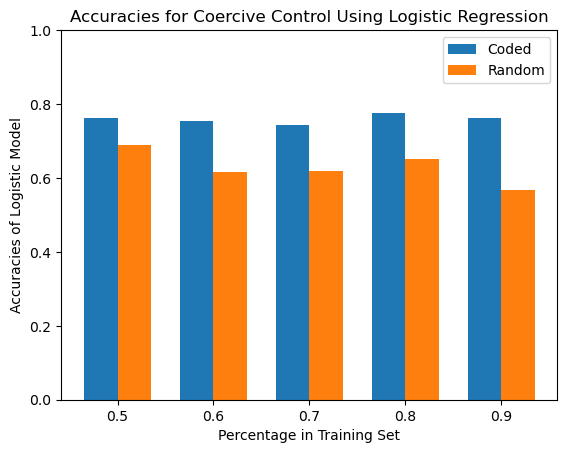

In [169]:
bar_width = 0.35
index = np.arange(len(cc_log["Percentage_in_Training_Set"]))
fig, ax = plt.subplots()
bar1 = ax.bar(index, cc_log["Coercive_Control_Coded_Accuracies"], bar_width, label = 'Coded')
bar2 = ax.bar(index + bar_width, cc_log['Coercive_Control_Random_Accuracies'], bar_width, label = 'Random')

ax.set_ylim(0,1)
ax.set_xlabel("Percentage in Training Set")
ax.set_ylabel("Accuracies of Logistic Model")
ax.set_title("Accuracies for Coercive Control Using Logistic Regression")
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(cc_log['Percentage_in_Training_Set'])
ax.legend()
plt.show()

In [170]:
et_log_columnnames = ["Percentage_in_Training_Set", "Existential_Threat_Coded_Accuracies", "Existential_Threat_Random_Accuracies"]

In [175]:
et_log_data = [
    [0.5, guidelines_accuracy(Y_2, 0.5), guidelines_accuracy(Y_2random, 0.5)],
    [0.6, guidelines_accuracy(Y_2, 0.6), guidelines_accuracy(Y_2random, 0.6)],
    [0.7, guidelines_accuracy(Y_2, 0.7), guidelines_accuracy(Y_2random, 0.7)],
    [0.8, guidelines_accuracy(Y_2, 0.8), guidelines_accuracy(Y_2random, 0.8)],
    [0.9, guidelines_accuracy(Y_2, 0.9), guidelines_accuracy(Y_2random, 0.9)]
        ]

C:\Users\piercev1\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\piercev1\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [176]:
et_log = pd.DataFrame(et_log_data, columns = et_log_columnnames)

In [177]:
et_log.head()

,Percentage_in_Training_Set,Existential_Threat_Coded_Accuracies,Existential_Threat_Random_Accuracies
0,0.5,0.833333,0.825397
1,0.6,0.847682,0.841060
2,0.7,0.806818,0.789773
3,0.8,0.830846,0.686567
4,0.9,0.809735,0.730088


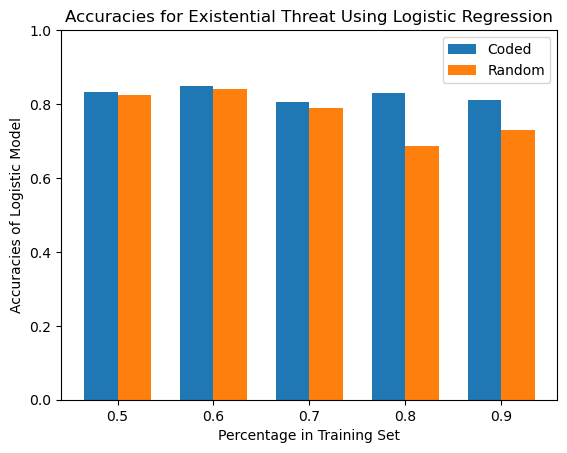

In [178]:
bar_width = 0.35
index = np.arange(len(et_log["Percentage_in_Training_Set"]))
fig, ax = plt.subplots()
bar1 = ax.bar(index, et_log["Existential_Threat_Coded_Accuracies"], bar_width, label = 'Coded')
bar2 = ax.bar(index + bar_width, et_log['Existential_Threat_Random_Accuracies'], bar_width, label = 'Random')

ax.set_ylim(0,1)
ax.set_xlabel("Percentage in Training Set")
ax.set_ylabel("Accuracies of Logistic Model")
ax.set_title("Accuracies for Existential Threat Using Logistic Regression")
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(cc_log['Percentage_in_Training_Set'])
ax.legend()
plt.show()

In [179]:
tg_log_columnnames = ["Percentage_in_Training_Set", "Target_Group_Coded_Accuracies", "Target_Group_Random_Accuracies"]

In [180]:
tg_log_data = [
    [0.5, guidelines_accuracy(Y_3, 0.5), guidelines_accuracy(Y_3random, 0.5)],
    [0.6, guidelines_accuracy(Y_3, 0.6), guidelines_accuracy(Y_3random, 0.6)],
    [0.7, guidelines_accuracy(Y_3, 0.7), guidelines_accuracy(Y_3random, 0.7)],
    [0.8, guidelines_accuracy(Y_3, 0.8), guidelines_accuracy(Y_3random, 0.8)],
    [0.9, guidelines_accuracy(Y_3, 0.9), guidelines_accuracy(Y_3random, 0.9)]
        ]

C:\Users\piercev1\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\piercev1\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [181]:
tg_log = pd.DataFrame(tg_log_data, columns = tg_log_columnnames)

In [182]:
tg_log.head()

,Percentage_in_Training_Set,Target_Group_Coded_Accuracies,Target_Group_Random_Accuracies
0,0.5,0.833333,0.666667
1,0.6,0.794702,0.662252
2,0.7,0.767045,0.642045
3,0.8,0.796020,0.636816
4,0.9,0.738938,0.566372


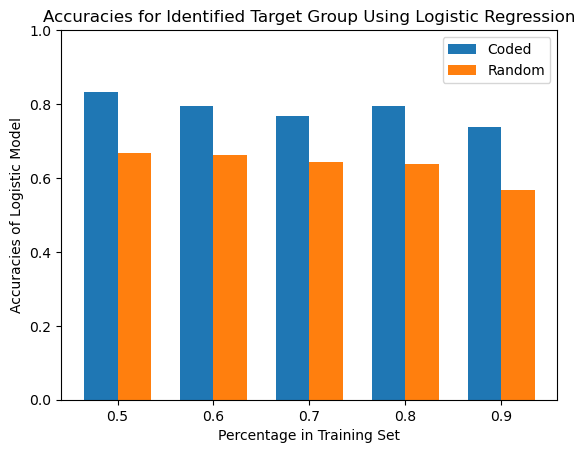

In [183]:
bar_width = 0.35
index = np.arange(len(tg_log["Percentage_in_Training_Set"]))
fig, ax = plt.subplots()
bar1 = ax.bar(index, tg_log["Target_Group_Coded_Accuracies"], bar_width, label = 'Coded')
bar2 = ax.bar(index + bar_width, tg_log['Target_Group_Random_Accuracies'], bar_width, label = 'Random')

ax.set_ylim(0,1)
ax.set_xlabel("Percentage in Training Set")
ax.set_ylabel("Accuracies of Logistic Model")
ax.set_title("Accuracies for Identified Target Group Using Logistic Regression")
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(cc_log['Percentage_in_Training_Set'])
ax.legend()
plt.show()

In [186]:
cc_rf_data = [
    [0.5, guidelines_accuracy_rf(Y_1, 0.5), guidelines_accuracy_rf(Y_1random, 0.5)],
    [0.6, guidelines_accuracy_rf(Y_1, 0.6), guidelines_accuracy_rf(Y_1random, 0.6)],
    [0.7, guidelines_accuracy_rf(Y_1, 0.7), guidelines_accuracy_rf(Y_1random, 0.7)],
    [0.8, guidelines_accuracy_rf(Y_1, 0.8), guidelines_accuracy_rf(Y_1random, 0.8)],
    [0.9, guidelines_accuracy_rf(Y_1, 0.9), guidelines_accuracy_rf(Y_1random, 0.9)]
        ]

In [187]:
cc_rf = pd.DataFrame(cc_rf_data, columns = cc_log_columnnames)

In [188]:
cc_rf.head()

,Percentage_in_Training_Set,Coercive_Control_Coded_Accuracies,Coercive_Control_Random_Accuracies
0,0.5,0.825397,0.619048
1,0.6,0.841060,0.701987
2,0.7,0.823864,0.676136
3,0.8,0.810945,0.656716
4,0.9,0.783186,0.654867


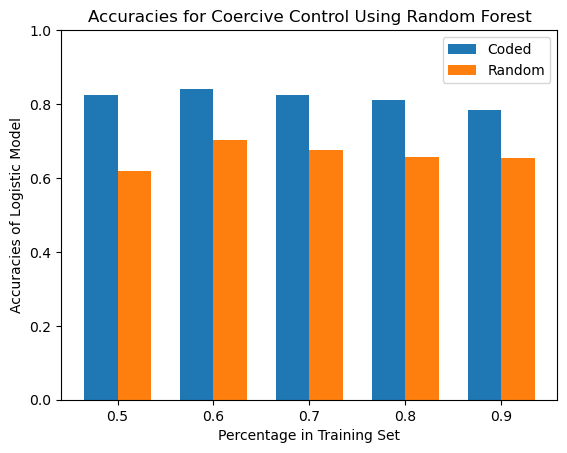

In [189]:
bar_width = 0.35
index = np.arange(len(cc_rf["Percentage_in_Training_Set"]))
fig, ax = plt.subplots()
bar1 = ax.bar(index, cc_rf["Coercive_Control_Coded_Accuracies"], bar_width, label = 'Coded')
bar2 = ax.bar(index + bar_width, cc_rf['Coercive_Control_Random_Accuracies'], bar_width, label = 'Random')

ax.set_ylim(0,1)
ax.set_xlabel("Percentage in Training Set")
ax.set_ylabel("Accuracies of Logistic Model")
ax.set_title("Accuracies for Coercive Control Using Random Forest")
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(cc_rf['Percentage_in_Training_Set'])
ax.legend()
plt.show()

In [190]:
et_rf_data = [
    [0.5, guidelines_accuracy_rf(Y_2, 0.5), guidelines_accuracy_rf(Y_2random, 0.5)],
    [0.6, guidelines_accuracy_rf(Y_2, 0.6), guidelines_accuracy_rf(Y_2random, 0.6)],
    [0.7, guidelines_accuracy_rf(Y_2, 0.7), guidelines_accuracy_rf(Y_2random, 0.7)],
    [0.8, guidelines_accuracy_rf(Y_2, 0.8), guidelines_accuracy_rf(Y_2random, 0.8)],
    [0.9, guidelines_accuracy_rf(Y_2, 0.9), guidelines_accuracy_rf(Y_2random, 0.9)]
        ]

In [191]:
et_rf = pd.DataFrame(et_rf_data, columns = et_log_columnnames)

In [192]:
et_rf.head()

,Percentage_in_Training_Set,Existential_Threat_Coded_Accuracies,Existential_Threat_Random_Accuracies
0,0.5,0.833333,0.825397
1,0.6,0.874172,0.834437
2,0.7,0.840909,0.812500
3,0.8,0.840796,0.810945
4,0.9,0.849558,0.778761


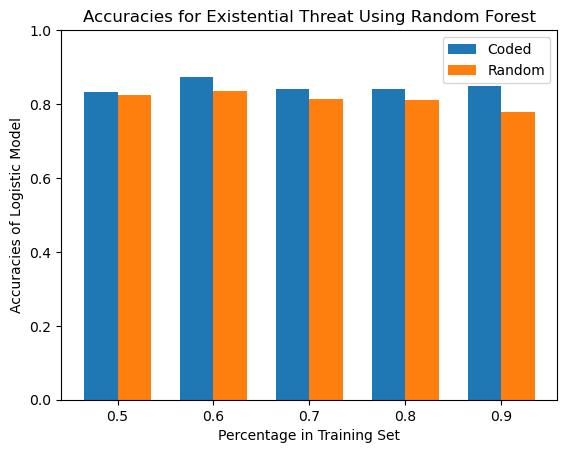

In [193]:
bar_width = 0.35
index = np.arange(len(et_rf["Percentage_in_Training_Set"]))
fig, ax = plt.subplots()
bar1 = ax.bar(index, et_rf["Existential_Threat_Coded_Accuracies"], bar_width, label = 'Coded')
bar2 = ax.bar(index + bar_width, et_rf['Existential_Threat_Random_Accuracies'], bar_width, label = 'Random')

ax.set_ylim(0,1)
ax.set_xlabel("Percentage in Training Set")
ax.set_ylabel("Accuracies of Logistic Model")
ax.set_title("Accuracies for Existential Threat Using Random Forest")
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(et_rf['Percentage_in_Training_Set'])
ax.legend()
plt.show()

In [194]:
tg_rf_data = [
    [0.5, guidelines_accuracy_rf(Y_3, 0.5), guidelines_accuracy_rf(Y_3random, 0.5)],
    [0.6, guidelines_accuracy_rf(Y_3, 0.6), guidelines_accuracy_rf(Y_3random, 0.6)],
    [0.7, guidelines_accuracy_rf(Y_3, 0.7), guidelines_accuracy_rf(Y_3random, 0.7)],
    [0.8, guidelines_accuracy_rf(Y_3, 0.8), guidelines_accuracy_rf(Y_3random, 0.8)],
    [0.9, guidelines_accuracy_rf(Y_3, 0.9), guidelines_accuracy_rf(Y_3random, 0.9)]
        ]

In [195]:
tg_rf = pd.DataFrame(tg_rf_data, columns = tg_log_columnnames)

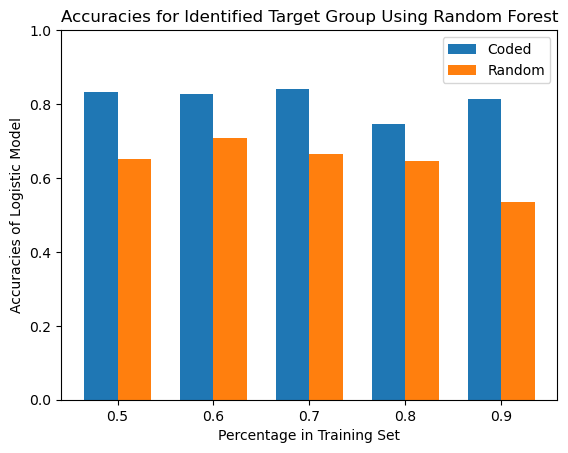

In [197]:
bar_width = 0.35
index = np.arange(len(tg_rf["Percentage_in_Training_Set"]))
fig, ax = plt.subplots()
bar1 = ax.bar(index, tg_rf["Target_Group_Coded_Accuracies"], bar_width, label = 'Coded')
bar2 = ax.bar(index + bar_width, tg_rf['Target_Group_Random_Accuracies'], bar_width, label = 'Random')

ax.set_ylim(0,1)
ax.set_xlabel("Percentage in Training Set")
ax.set_ylabel("Accuracies of Logistic Model")
ax.set_title("Accuracies for Identified Target Group Using Random Forest")
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(tg_rf['Percentage_in_Training_Set'])
ax.legend()
plt.show()

In [203]:
cc_log_list_coded = []
cc_log_list_random = []
for i in range(0,10000):
    acc_coded = guidelines_accuracy(Y_1, 0.5)
    acc_random = guidelines_accuracy(Y_1random, 0.5)
    cc_log_list_coded.append(acc_coded)
    cc_log_list_random.append(acc_random)

In [204]:
len(cc_log_list_coded)

10000

In [205]:
len(cc_log_list_random)

10000

In [206]:
print(np.percentile(cc_log_list_coded, 10))
print(np.mean(cc_log_list_coded))
print(np.percentile(cc_log_list_coded, 50))
print(np.percentile(cc_log_list_coded, 90))

0.746031746031746
0.7900277777777779
0.7936507936507936
0.8253968253968254


In [207]:
print(np.percentile(cc_log_list_random, 10))
print(np.mean(cc_log_list_random))
print(np.percentile(cc_log_list_random, 50))
print(np.percentile(cc_log_list_random, 90))

0.6031746031746031
0.6499777777777778
0.6507936507936508
0.6904761904761905


In [208]:
list1 = [4,5,6]
list2 = [1,2,3]

In [209]:
list1

[4, 5, 6]

In [210]:
list2

[1, 2, 3]

In [218]:
def bts_log(Y, t):
    list = []
    for i in range(0,10000):
        acc = guidelines_accuracy(Y, t)
        list.append(acc)
    print("Done")
    return(list)

In [219]:
def bts_rf(Y, t):
    list = []
    for i in range(0,10000):
        acc = guidelines_accuracy_rf(Y, t)
        list.append(acc)
    print("Done")
    return(list)

In [223]:
cc_log_coded_50 = bts_log(Y_1, 0.5)
cc_log_coded_60 = bts_log(Y_1, 0.6)
cc_log_coded_70 = bts_log(Y_1, 0.7)
cc_log_coded_80 = bts_log(Y_1, 0.8)
cc_log_coded_90 = bts_log(Y_1, 0.9)

Done
Done
Done
Done
Done


In [224]:
cc_log_random_50 = bts_log(Y_1random, 0.5)
cc_log_random_60 = bts_log(Y_1random, 0.6)
cc_log_random_70 = bts_log(Y_1random, 0.7)
cc_log_random_80 = bts_log(Y_1random, 0.8)
cc_log_random_90 = bts_log(Y_1random, 0.9)

Done
Done
Done
Done
Done


In [225]:
et_log_coded_50 = bts_log(Y_2, 0.5)
et_log_coded_60 = bts_log(Y_2, 0.6)
et_log_coded_70 = bts_log(Y_2, 0.7)
et_log_coded_80 = bts_log(Y_2, 0.8)
et_log_coded_90 = bts_log(Y_2, 0.9)

Done
Done
Done
Done
Done


In [226]:
et_log_random_50 = bts_log(Y_2random, 0.5)
et_log_random_60 = bts_log(Y_2random, 0.6)
et_log_random_70 = bts_log(Y_2random, 0.7)
et_log_random_80 = bts_log(Y_2random, 0.8)
et_log_random_90 = bts_log(Y_2random, 0.9)

Done
Done
Done
Done
Done


In [227]:
tg_log_coded_50 = bts_log(Y_3, 0.5)
tg_log_coded_60 = bts_log(Y_3, 0.6)
tg_log_coded_70 = bts_log(Y_3, 0.7)
tg_log_coded_80 = bts_log(Y_3, 0.8)
tg_log_coded_90 = bts_log(Y_3, 0.9)

Done
Done
Done
Done
Done


In [228]:
tg_log_random_50 = bts_log(Y_3random, 0.5)
tg_log_random_60 = bts_log(Y_3random, 0.6)
tg_log_random_70 = bts_log(Y_3random, 0.7)
tg_log_random_80 = bts_log(Y_3random, 0.8)
tg_log_random_90 = bts_log(Y_3random, 0.9)

Done
Done
Done
Done
Done


In [229]:
cc_rf_coded_50 = bts_rf(Y_1, 0.5)
cc_rf_coded_60 = bts_rf(Y_1, 0.6)
cc_rf_coded_70 = bts_rf(Y_1, 0.7)
cc_rf_coded_80 = bts_rf(Y_1, 0.8)
cc_rf_coded_90 = bts_rf(Y_1, 0.9)

Done
Done
Done
Done
Done


In [241]:
cc_rf_random_50 = bts_rf(Y_1random, 0.5)
cc_rf_random_60 = bts_rf(Y_1random, 0.6)
cc_rf_random_70 = bts_rf(Y_1random, 0.7)
cc_rf_random_80 = bts_rf(Y_1random, 0.8)
cc_rf_random_90 = bts_rf(Y_1random, 0.9)

Done
Done
Done
Done
Done


In [244]:
et_rf_coded_50 = bts_rf(Y_2, 0.5)
et_rf_coded_60 = bts_rf(Y_2, 0.6)
et_rf_coded_70 = bts_rf(Y_2, 0.7)
et_rf_coded_80 = bts_rf(Y_2, 0.8)
et_rf_coded_90 = bts_rf(Y_2, 0.9)

Done
Done
Done
Done
Done


In [245]:
et_rf_random_50 = bts_rf(Y_2random, 0.5)
et_rf_random_60 = bts_rf(Y_2random, 0.6)
et_rf_random_70 = bts_rf(Y_2random, 0.7)
et_rf_random_80 = bts_rf(Y_2random, 0.8)
et_rf_random_90 = bts_rf(Y_2random, 0.9)

Done
Done
Done
Done
Done


In [260]:
tg_rf_coded_50 = bts_rf(Y_3, 0.5)
tg_rf_coded_60 = bts_rf(Y_3, 0.6)
tg_rf_coded_70 = bts_rf(Y_3, 0.7)
tg_rf_coded_80 = bts_rf(Y_3, 0.8)
tg_rf_coded_90 = bts_rf(Y_3, 0.9)

Done
Done
Done
Done
Done


In [272]:
tg_rf_random_50 = bts_rf(Y_3random, 0.5)
tg_rf_random_60 = bts_rf(Y_3random, 0.6)
tg_rf_random_70 = bts_rf(Y_3random, 0.7)
tg_rf_random_80 = bts_rf(Y_3random, 0.8)
tg_rf_random_90 = bts_rf(Y_3random, 0.9)

Done
Done
Done
Done
Done


In [261]:
cols = ["Percentage_in_Training_Set", "Median_Coded_Accuracies", "Coded_Accuracies_Upper_Error", "Coded_Accuracies_Lower_Error", "Median_Random_Accuracies", "Random_Accuracies_Upper_Error", "Random_Accuracies_Lower_Error"]

In [262]:
cc_log_data = [
    [0.5, np.percentile(cc_log_coded_50, 50), np.percentile(cc_log_coded_50,90)-np.percentile(cc_log_coded_50,50), np.percentile(cc_log_coded_50,50)-np.percentile(cc_log_coded_50,10), np.percentile(cc_log_random_50, 50), np.percentile(cc_log_random_50,90)-np.percentile(cc_log_random_50,50), np.percentile(cc_log_random_50,50)-np.percentile(cc_log_random_50,10)],
    [0.6, np.percentile(cc_log_coded_60, 50), np.percentile(cc_log_coded_60,90)-np.percentile(cc_log_coded_60,50), np.percentile(cc_log_coded_60,50)-np.percentile(cc_log_coded_60,10), np.percentile(cc_log_random_60, 50), np.percentile(cc_log_random_60,90)-np.percentile(cc_log_random_60,50), np.percentile(cc_log_random_60,50)-np.percentile(cc_log_random_60,10)],
    [0.7, np.percentile(cc_log_coded_70, 50), np.percentile(cc_log_coded_70,90)-np.percentile(cc_log_coded_70,50), np.percentile(cc_log_coded_70,50)-np.percentile(cc_log_coded_70,10), np.percentile(cc_log_random_70, 50), np.percentile(cc_log_random_70,90)-np.percentile(cc_log_random_70,50), np.percentile(cc_log_random_70,50)-np.percentile(cc_log_random_70,10)],
    [0.8, np.percentile(cc_log_coded_80, 50), np.percentile(cc_log_coded_80,90)-np.percentile(cc_log_coded_80,50), np.percentile(cc_log_coded_80,50)-np.percentile(cc_log_coded_80,10), np.percentile(cc_log_random_80, 50), np.percentile(cc_log_random_80,90)-np.percentile(cc_log_random_80,50), np.percentile(cc_log_random_80,50)-np.percentile(cc_log_random_80,10)],
    [0.9, np.percentile(cc_log_coded_90, 50), np.percentile(cc_log_coded_90,90)-np.percentile(cc_log_coded_90,50), np.percentile(cc_log_coded_90,50)-np.percentile(cc_log_coded_90,10), np.percentile(cc_log_random_90, 50), np.percentile(cc_log_random_90,90)-np.percentile(cc_log_random_90,50), np.percentile(cc_log_random_90,50)-np.percentile(cc_log_random_90,10)]
]
cc_log = pd.DataFrame(cc_log_data, columns = cols)
cc_log.head()

,Percentage_in_Training_Set,Median_Coded_Accuracies,Coded_Accuracies_Upper_Error,Coded_Accuracies_Lower_Error,Median_Random_Accuracies,Random_Accuracies_Upper_Error,Random_Accuracies_Lower_Error
0,0.5,0.793651,0.039683,0.039683,0.658730,0.031746,0.047619
1,0.6,0.788079,0.033113,0.033113,0.649007,0.033113,0.052980
2,0.7,0.778409,0.034091,0.034091,0.636364,0.039773,0.051136
3,0.8,0.771144,0.029851,0.034826,0.626866,0.039801,0.049751
4,0.9,0.752212,0.035398,0.053097,0.610619,0.048673,0.057522


In [263]:
et_log_data = [
    [0.5, np.percentile(et_log_coded_50, 50), np.percentile(et_log_coded_50,90)-np.percentile(et_log_coded_50,50), np.percentile(et_log_coded_50,50)-np.percentile(et_log_coded_50,10), np.percentile(et_log_random_50, 50), np.percentile(et_log_random_50,90)-np.percentile(et_log_random_50,50), np.percentile(et_log_random_50,50)-np.percentile(et_log_random_50,10)],
    [0.6, np.percentile(et_log_coded_60, 50), np.percentile(et_log_coded_60,90)-np.percentile(et_log_coded_60,50), np.percentile(et_log_coded_60,50)-np.percentile(et_log_coded_60,10), np.percentile(et_log_random_60, 50), np.percentile(et_log_random_60,90)-np.percentile(et_log_random_60,50), np.percentile(et_log_random_60,50)-np.percentile(et_log_random_60,10)],
    [0.7, np.percentile(et_log_coded_70, 50), np.percentile(et_log_coded_70,90)-np.percentile(et_log_coded_70,50), np.percentile(et_log_coded_70,50)-np.percentile(et_log_coded_70,10), np.percentile(et_log_random_70, 50), np.percentile(et_log_random_70,90)-np.percentile(et_log_random_70,50), np.percentile(et_log_random_70,50)-np.percentile(et_log_random_70,10)],
    [0.8, np.percentile(et_log_coded_80, 50), np.percentile(et_log_coded_80,90)-np.percentile(et_log_coded_80,50), np.percentile(et_log_coded_80,50)-np.percentile(et_log_coded_80,10), np.percentile(et_log_random_80, 50), np.percentile(et_log_random_80,90)-np.percentile(et_log_random_80,50), np.percentile(et_log_random_80,50)-np.percentile(et_log_random_80,10)],
    [0.9, np.percentile(et_log_coded_90, 50), np.percentile(et_log_coded_90,90)-np.percentile(et_log_coded_90,50), np.percentile(et_log_coded_90,50)-np.percentile(et_log_coded_90,10), np.percentile(et_log_random_90, 50), np.percentile(et_log_random_90,90)-np.percentile(et_log_random_90,50), np.percentile(et_log_random_90,50)-np.percentile(et_log_random_90,10)]
]
et_log = pd.DataFrame(et_log_data, columns = cols)
et_log.head()

,Percentage_in_Training_Set,Median_Coded_Accuracies,Coded_Accuracies_Upper_Error,Coded_Accuracies_Lower_Error,Median_Random_Accuracies,Random_Accuracies_Upper_Error,Random_Accuracies_Lower_Error
0,0.5,0.849206,0.023810,0.039683,0.801587,0.023810,0.039683
1,0.6,0.841060,0.033113,0.033113,0.794702,0.026490,0.039735
2,0.7,0.835227,0.028409,0.034091,0.784091,0.028409,0.045455
3,0.8,0.830846,0.029851,0.044776,0.766169,0.034826,0.044776
4,0.9,0.809735,0.035398,0.044248,0.761062,0.039823,0.061947


In [264]:
tg_log_data = [
    [0.5, np.percentile(tg_log_coded_50, 50), np.percentile(tg_log_coded_50,90)-np.percentile(tg_log_coded_50,50), np.percentile(tg_log_coded_50,50)-np.percentile(tg_log_coded_50,10), np.percentile(tg_log_random_50, 50), np.percentile(tg_log_random_50,90)-np.percentile(tg_log_random_50,50), np.percentile(tg_log_random_50,50)-np.percentile(tg_log_random_50,10)],
    [0.6, np.percentile(tg_log_coded_60, 50), np.percentile(tg_log_coded_60,90)-np.percentile(tg_log_coded_60,50), np.percentile(tg_log_coded_60,50)-np.percentile(tg_log_coded_60,10), np.percentile(tg_log_random_60, 50), np.percentile(tg_log_random_60,90)-np.percentile(tg_log_random_60,50), np.percentile(tg_log_random_60,50)-np.percentile(tg_log_random_60,10)],
    [0.7, np.percentile(tg_log_coded_70, 50), np.percentile(tg_log_coded_70,90)-np.percentile(tg_log_coded_70,50), np.percentile(tg_log_coded_70,50)-np.percentile(tg_log_coded_70,10), np.percentile(tg_log_random_70, 50), np.percentile(tg_log_random_70,90)-np.percentile(tg_log_random_70,50), np.percentile(tg_log_random_70,50)-np.percentile(tg_log_random_70,10)],
    [0.8, np.percentile(tg_log_coded_80, 50), np.percentile(tg_log_coded_80,90)-np.percentile(tg_log_coded_80,50), np.percentile(tg_log_coded_80,50)-np.percentile(tg_log_coded_80,10), np.percentile(tg_log_random_80, 50), np.percentile(tg_log_random_80,90)-np.percentile(tg_log_random_80,50), np.percentile(tg_log_random_80,50)-np.percentile(tg_log_random_80,10)],
    [0.9, np.percentile(tg_log_coded_90, 50), np.percentile(tg_log_coded_90,90)-np.percentile(tg_log_coded_90,50), np.percentile(tg_log_coded_90,50)-np.percentile(tg_log_coded_90,10), np.percentile(tg_log_random_90, 50), np.percentile(tg_log_random_90,90)-np.percentile(tg_log_random_90,50), np.percentile(tg_log_random_90,50)-np.percentile(tg_log_random_90,10)]
]
tg_log = pd.DataFrame(tg_log_data, columns = cols)
tg_log.head()

,Percentage_in_Training_Set,Median_Coded_Accuracies,Coded_Accuracies_Upper_Error,Coded_Accuracies_Lower_Error,Median_Random_Accuracies,Random_Accuracies_Upper_Error,Random_Accuracies_Lower_Error
0,0.5,0.809524,0.031746,0.039683,0.674603,0.039683,0.047619
1,0.6,0.801325,0.033113,0.033113,0.668874,0.033113,0.046358
2,0.7,0.795455,0.028409,0.034091,0.659091,0.034091,0.045455
3,0.8,0.786070,0.029851,0.034826,0.641791,0.044776,0.049751
4,0.9,0.769912,0.030973,0.053097,0.628319,0.048673,0.057522


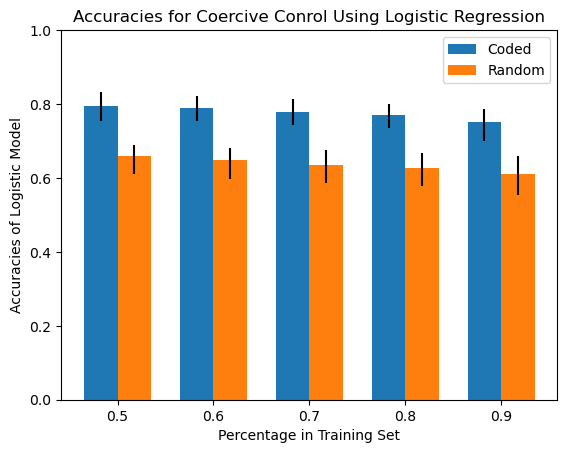

In [265]:
bar_width = 0.35
index = np.arange(len(cc_log["Percentage_in_Training_Set"]))
fig, ax = plt.subplots()
bar1 = ax.bar(index, cc_log["Median_Coded_Accuracies"], bar_width, yerr=[cc_log["Coded_Accuracies_Lower_Error"], cc_log["Coded_Accuracies_Upper_Error"]], label = 'Coded')
bar2 = ax.bar(index + bar_width, cc_log['Median_Random_Accuracies'], bar_width, yerr=[cc_log["Random_Accuracies_Lower_Error"],cc_log["Random_Accuracies_Upper_Error"]], label = 'Random')

ax.set_ylim(0,1)
ax.set_xlabel("Percentage in Training Set")
ax.set_ylabel("Accuracies of Logistic Model")
ax.set_title("Accuracies for Coercive Conrol Using Logistic Regression")
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(tg_rf['Percentage_in_Training_Set'])
ax.legend()
plt.show()

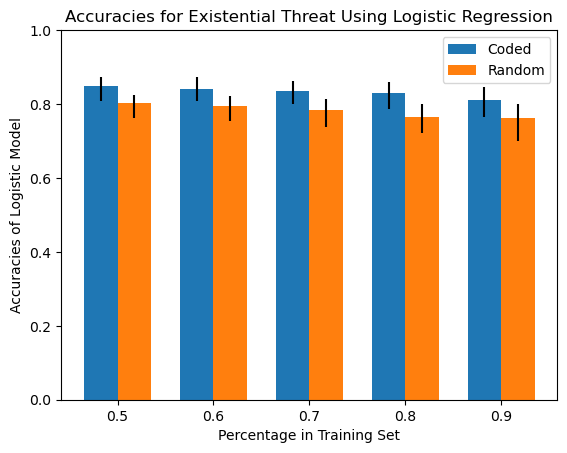

In [266]:
bar_width = 0.35
index = np.arange(len(et_log["Percentage_in_Training_Set"]))
fig, ax = plt.subplots()
bar1 = ax.bar(index, et_log["Median_Coded_Accuracies"], bar_width, yerr=[et_log["Coded_Accuracies_Lower_Error"],et_log["Coded_Accuracies_Upper_Error"]], label = 'Coded')
bar2 = ax.bar(index + bar_width, et_log['Median_Random_Accuracies'], bar_width, yerr=[et_log["Random_Accuracies_Lower_Error"],et_log["Random_Accuracies_Upper_Error"]], label = 'Random')

ax.set_ylim(0,1)
ax.set_xlabel("Percentage in Training Set")
ax.set_ylabel("Accuracies of Logistic Model")
ax.set_title("Accuracies for Existential Threat Using Logistic Regression")
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(et_rf['Percentage_in_Training_Set'])
ax.legend()
plt.show()

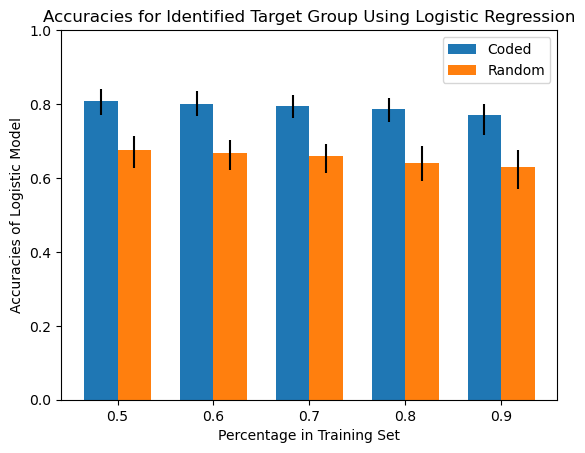

In [267]:
bar_width = 0.35
index = np.arange(len(tg_log["Percentage_in_Training_Set"]))
fig, ax = plt.subplots()
bar1 = ax.bar(index, tg_log["Median_Coded_Accuracies"], bar_width, yerr=[tg_log["Coded_Accuracies_Lower_Error"],tg_log["Coded_Accuracies_Upper_Error"]], label = 'Coded')
bar2 = ax.bar(index + bar_width, tg_log['Median_Random_Accuracies'], bar_width, yerr=[tg_log["Random_Accuracies_Lower_Error"],tg_log["Random_Accuracies_Upper_Error"]], label = 'Random')

ax.set_ylim(0,1)
ax.set_xlabel("Percentage in Training Set")
ax.set_ylabel("Accuracies of Logistic Model")
ax.set_title("Accuracies for Identified Target Group Using Logistic Regression")
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(tg_rf['Percentage_in_Training_Set'])
ax.legend()
plt.show()

In [268]:
cc_rf_data = [
    [0.5, np.percentile(cc_rf_coded_50, 50), np.percentile(cc_rf_coded_50,90)-np.percentile(cc_rf_coded_50,50), np.percentile(cc_rf_coded_50,50)-np.percentile(cc_rf_coded_50,10), np.percentile(cc_rf_random_50, 50), np.percentile(cc_rf_random_50,90)-np.percentile(cc_rf_random_50,50), np.percentile(cc_rf_random_50,50)-np.percentile(cc_rf_random_50,10)],
    [0.6, np.percentile(cc_rf_coded_60, 50), np.percentile(cc_rf_coded_60,90)-np.percentile(cc_rf_coded_60,50), np.percentile(cc_rf_coded_60,50)-np.percentile(cc_rf_coded_60,10), np.percentile(cc_rf_random_60, 50), np.percentile(cc_rf_random_60,90)-np.percentile(cc_rf_random_60,50), np.percentile(cc_rf_random_60,50)-np.percentile(cc_rf_random_60,10)],
    [0.7, np.percentile(cc_rf_coded_70, 50), np.percentile(cc_rf_coded_70,90)-np.percentile(cc_rf_coded_70,50), np.percentile(cc_rf_coded_70,50)-np.percentile(cc_rf_coded_70,10), np.percentile(cc_rf_random_70, 50), np.percentile(cc_rf_random_70,90)-np.percentile(cc_rf_random_70,50), np.percentile(cc_rf_random_70,50)-np.percentile(cc_rf_random_70,10)],
    [0.8, np.percentile(cc_rf_coded_80, 50), np.percentile(cc_rf_coded_80,90)-np.percentile(cc_rf_coded_80,50), np.percentile(cc_rf_coded_80,50)-np.percentile(cc_rf_coded_80,10), np.percentile(cc_rf_random_80, 50), np.percentile(cc_rf_random_80,90)-np.percentile(cc_rf_random_80,50), np.percentile(cc_rf_random_80,50)-np.percentile(cc_rf_random_80,10)],
    [0.9, np.percentile(cc_rf_coded_90, 50), np.percentile(cc_rf_coded_90,90)-np.percentile(cc_rf_coded_90,50), np.percentile(cc_rf_coded_90,50)-np.percentile(cc_rf_coded_90,10), np.percentile(cc_rf_random_90, 50), np.percentile(cc_rf_random_90,90)-np.percentile(cc_rf_random_90,50), np.percentile(cc_rf_random_90,50)-np.percentile(cc_rf_random_90,10)]
]
cc_rf = pd.DataFrame(cc_rf_data, columns = cols)
cc_rf.head()

,Percentage_in_Training_Set,Median_Coded_Accuracies,Coded_Accuracies_Upper_Error,Coded_Accuracies_Lower_Error,Median_Random_Accuracies,Random_Accuracies_Upper_Error,Random_Accuracies_Lower_Error
0,0.5,0.857143,0.039683,0.047619,0.666667,0.039683,0.039683
1,0.6,0.841060,0.039735,0.046358,0.668874,0.026490,0.039735
2,0.7,0.823864,0.034091,0.045455,0.664773,0.028409,0.039773
3,0.8,0.796020,0.039801,0.039801,0.666667,0.029851,0.049751
4,0.9,0.761062,0.039823,0.048673,0.668142,0.030973,0.084071


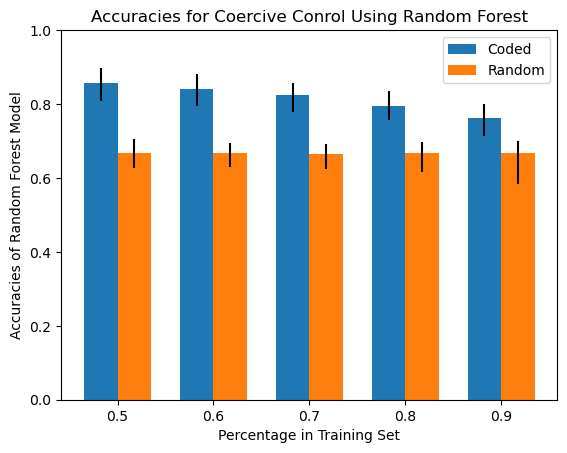

In [269]:
bar_width = 0.35
index = np.arange(len(cc_rf["Percentage_in_Training_Set"]))
fig, ax = plt.subplots()
bar1 = ax.bar(index, cc_rf["Median_Coded_Accuracies"], bar_width, yerr=[cc_rf["Coded_Accuracies_Lower_Error"], cc_rf["Coded_Accuracies_Upper_Error"]], label = 'Coded')
bar2 = ax.bar(index + bar_width, cc_rf['Median_Random_Accuracies'], bar_width, yerr=[cc_rf["Random_Accuracies_Lower_Error"],cc_rf["Random_Accuracies_Upper_Error"]], label = 'Random')

ax.set_ylim(0,1)
ax.set_xlabel("Percentage in Training Set")
ax.set_ylabel("Accuracies of Random Forest Model")
ax.set_title("Accuracies for Coercive Conrol Using Random Forest")
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(tg_rf['Percentage_in_Training_Set'])
ax.legend()
plt.show()

In [270]:
et_rf_data = [
    [0.5, np.percentile(et_rf_coded_50, 50), np.percentile(et_rf_coded_50,90)-np.percentile(et_rf_coded_50,50), np.percentile(et_rf_coded_50,50)-np.percentile(et_rf_coded_50,10), np.percentile(et_rf_random_50, 50), np.percentile(et_rf_random_50,90)-np.percentile(et_rf_random_50,50), np.percentile(et_rf_random_50,50)-np.percentile(et_rf_random_50,10)],
    [0.6, np.percentile(et_rf_coded_60, 50), np.percentile(et_rf_coded_60,90)-np.percentile(et_rf_coded_60,50), np.percentile(et_rf_coded_60,50)-np.percentile(et_rf_coded_60,10), np.percentile(et_rf_random_60, 50), np.percentile(et_rf_random_60,90)-np.percentile(et_rf_random_60,50), np.percentile(et_rf_random_60,50)-np.percentile(et_rf_random_60,10)],
    [0.7, np.percentile(et_rf_coded_70, 50), np.percentile(et_rf_coded_70,90)-np.percentile(et_rf_coded_70,50), np.percentile(et_rf_coded_70,50)-np.percentile(et_rf_coded_70,10), np.percentile(et_rf_random_70, 50), np.percentile(et_rf_random_70,90)-np.percentile(et_rf_random_70,50), np.percentile(et_rf_random_70,50)-np.percentile(et_rf_random_70,10)],
    [0.8, np.percentile(et_rf_coded_80, 50), np.percentile(et_rf_coded_80,90)-np.percentile(et_rf_coded_80,50), np.percentile(et_rf_coded_80,50)-np.percentile(et_rf_coded_80,10), np.percentile(et_rf_random_80, 50), np.percentile(et_rf_random_80,90)-np.percentile(et_rf_random_80,50), np.percentile(et_rf_random_80,50)-np.percentile(et_rf_random_80,10)],
    [0.9, np.percentile(et_rf_coded_90, 50), np.percentile(et_rf_coded_90,90)-np.percentile(et_rf_coded_90,50), np.percentile(et_rf_coded_90,50)-np.percentile(et_rf_coded_90,10), np.percentile(et_rf_random_90, 50), np.percentile(et_rf_random_90,90)-np.percentile(et_rf_random_90,50), np.percentile(et_rf_random_90,50)-np.percentile(et_rf_random_90,10)]
]
et_rf = pd.DataFrame(et_rf_data, columns = cols)
et_rf.head()

,Percentage_in_Training_Set,Median_Coded_Accuracies,Coded_Accuracies_Upper_Error,Coded_Accuracies_Lower_Error,Median_Random_Accuracies,Random_Accuracies_Upper_Error,Random_Accuracies_Lower_Error
0,0.5,0.880952,0.031746,0.047619,0.809524,0.023810,0.031746
1,0.6,0.867550,0.039735,0.039735,0.807947,0.019868,0.026490
2,0.7,0.857955,0.034091,0.034091,0.801136,0.022727,0.017045
3,0.8,0.845771,0.029851,0.029851,0.805970,0.014925,0.024876
4,0.9,0.831858,0.026549,0.022124,0.809735,0.008850,0.044248


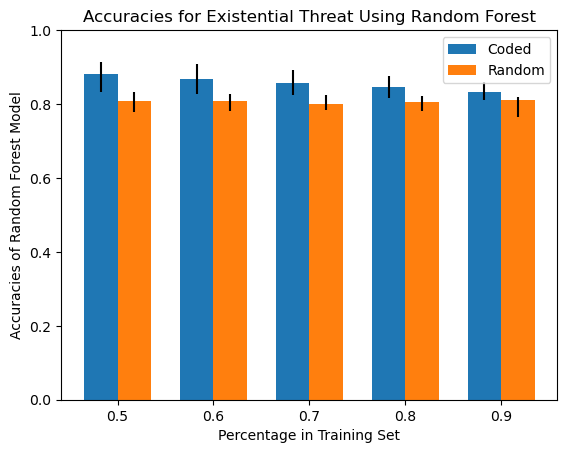

In [271]:
bar_width = 0.35
index = np.arange(len(et_rf["Percentage_in_Training_Set"]))
fig, ax = plt.subplots()
bar1 = ax.bar(index, et_rf["Median_Coded_Accuracies"], bar_width, yerr=[et_rf["Coded_Accuracies_Lower_Error"], et_rf["Coded_Accuracies_Upper_Error"]], label = 'Coded')
bar2 = ax.bar(index + bar_width, et_rf['Median_Random_Accuracies'], bar_width, yerr=[et_rf["Random_Accuracies_Lower_Error"], et_rf["Random_Accuracies_Upper_Error"]], label = 'Random')

ax.set_ylim(0,1)
ax.set_xlabel("Percentage in Training Set")
ax.set_ylabel("Accuracies of Random Forest Model")
ax.set_title("Accuracies for Existential Threat Using Random Forest")
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(tg_rf['Percentage_in_Training_Set'])
ax.legend()
plt.show()

In [273]:
tg_rf_data = [
    [0.5, np.percentile(tg_rf_coded_50, 50), np.percentile(tg_rf_coded_50,90)-np.percentile(tg_rf_coded_50,50), np.percentile(tg_rf_coded_50,50)-np.percentile(tg_rf_coded_50,10), np.percentile(tg_rf_random_50, 50), np.percentile(tg_rf_random_50,90)-np.percentile(tg_rf_random_50,50), np.percentile(tg_rf_random_50,50)-np.percentile(tg_rf_random_50,10)],
    [0.6, np.percentile(tg_rf_coded_60, 50), np.percentile(tg_rf_coded_60,90)-np.percentile(tg_rf_coded_60,50), np.percentile(tg_rf_coded_60,50)-np.percentile(tg_rf_coded_60,10), np.percentile(tg_rf_random_60, 50), np.percentile(tg_rf_random_60,90)-np.percentile(tg_rf_random_60,50), np.percentile(tg_rf_random_60,50)-np.percentile(tg_rf_random_60,10)],
    [0.7, np.percentile(tg_rf_coded_70, 50), np.percentile(tg_rf_coded_70,90)-np.percentile(tg_rf_coded_70,50), np.percentile(tg_rf_coded_70,50)-np.percentile(tg_rf_coded_70,10), np.percentile(tg_rf_random_70, 50), np.percentile(tg_rf_random_70,90)-np.percentile(tg_rf_random_70,50), np.percentile(tg_rf_random_70,50)-np.percentile(tg_rf_random_70,10)],
    [0.8, np.percentile(tg_rf_coded_80, 50), np.percentile(tg_rf_coded_80,90)-np.percentile(tg_rf_coded_80,50), np.percentile(tg_rf_coded_80,50)-np.percentile(tg_rf_coded_80,10), np.percentile(tg_rf_random_80, 50), np.percentile(tg_rf_random_80,90)-np.percentile(tg_rf_random_80,50), np.percentile(tg_rf_random_80,50)-np.percentile(tg_rf_random_80,10)],
    [0.9, np.percentile(tg_rf_coded_90, 50), np.percentile(tg_rf_coded_90,90)-np.percentile(tg_rf_coded_90,50), np.percentile(tg_rf_coded_90,50)-np.percentile(tg_rf_coded_90,10), np.percentile(tg_rf_random_90, 50), np.percentile(tg_rf_random_90,90)-np.percentile(tg_rf_random_90,50), np.percentile(tg_rf_random_90,50)-np.percentile(tg_rf_random_90,10)]
]
tg_rf = pd.DataFrame(tg_rf_data, columns = cols)
tg_rf.head()

,Percentage_in_Training_Set,Median_Coded_Accuracies,Coded_Accuracies_Upper_Error,Coded_Accuracies_Lower_Error,Median_Random_Accuracies,Random_Accuracies_Upper_Error,Random_Accuracies_Lower_Error
0,0.5,0.857143,0.039683,0.039683,0.682540,0.031746,0.039683
1,0.6,0.847682,0.033113,0.039735,0.682119,0.026490,0.033113
2,0.7,0.829545,0.039773,0.039773,0.681818,0.028409,0.039773
3,0.8,0.810945,0.034826,0.044776,0.686567,0.024876,0.054726
4,0.9,0.774336,0.039823,0.044248,0.690265,0.026549,0.084071


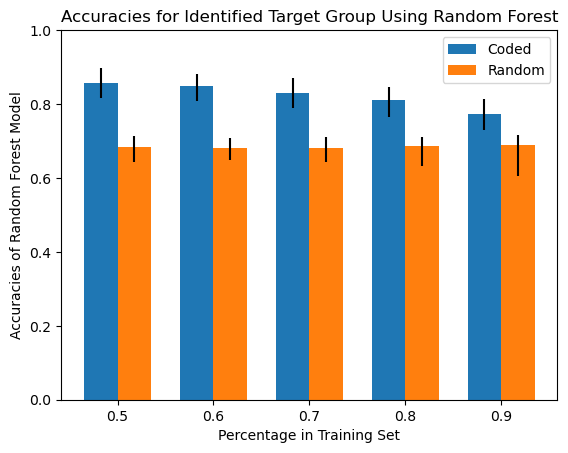

In [274]:
bar_width = 0.35
index = np.arange(len(tg_rf["Percentage_in_Training_Set"]))
fig, ax = plt.subplots()
bar1 = ax.bar(index, tg_rf["Median_Coded_Accuracies"], bar_width, yerr=[tg_rf["Coded_Accuracies_Lower_Error"], tg_rf["Coded_Accuracies_Upper_Error"]], label = 'Coded')
bar2 = ax.bar(index + bar_width, tg_rf['Median_Random_Accuracies'], bar_width, yerr=[tg_rf["Random_Accuracies_Lower_Error"],tg_rf["Random_Accuracies_Upper_Error"]], label = 'Random')

ax.set_ylim(0,1)
ax.set_xlabel("Percentage in Training Set")
ax.set_ylabel("Accuracies of Random Forest Model")
ax.set_title("Accuracies for Identified Target Group Using Random Forest")
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(tg_rf['Percentage_in_Training_Set'])
ax.legend()
plt.show()